In [2]:
import librosa
from pyAudioAnalysis.audioTrainTest import extract_features_and_train 
from pyAudioAnalysis import audioTrainTest as aT 
from pyAudioAnalysis import MidTermFeatures as mT 
from skimage import feature
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from skimage.feature import match_template
import os
from sklearn.model_selection import train_test_split
import random
import shutil
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

In [2]:
from os import listdir

def find_npy_filenames( path_to_dir, suffix=".npy" ):
    filenames = listdir(path_to_dir)
    return [ filename for filename in filenames if filename.endswith( suffix ) ]

def find_wav_filenames( path_to_dir, suffix=".wav" ):
    filenames = listdir(path_to_dir)
    return [ filename for filename in filenames if filename.endswith( suffix ) ]

In [5]:
np.set_printoptions(precision=2,suppress=True)

In [5]:
# Custom Train - Test split 
source_dir="Template1/positive_wavs/0.785/"
destination_dir="Template1/positive_wavs/0.785_Test/"
os.mkdir(destination_dir)
wav_names = find_wav_filenames(source_dir)
print(len(wav_names))
samples=random.sample(range(len(wav_names)), int(len(wav_names)/5))
for i in samples: shutil.move(source_dir+wav_names[i],destination_dir)

868


In [7]:
source_dir="Template1/negative_wavs/0.785_Sample100_Test/"
destination_dir="Template1/negative_wavs/0.785_Sample100/"
#os.mkdir(destination_dir)
wav_names = find_wav_filenames(source_dir)
print(len(wav_names))
samples=random.sample(range(len(wav_names)), int(len(wav_names)/2))
for i in samples: shutil.move(source_dir+wav_names[i],destination_dir)

2034


In [8]:
dirs0="Template1/positive_wavs/"
dirs1="Template1/negative_wavs/"
mt, st = 0.3, 0.02 

In [9]:
npp=find_npy_filenames(dirs1+'0.785_Sample100')
arr1=np.load(dirs1+'0.785_Sample100/'+npp[0])

In [75]:
feature_names=np.load('mid_feature_names.npy')
print(len(feature_names))
print(feature_names)

136
['zcr_mean' 'energy_mean' 'energy_entropy_mean' 'spectral_centroid_mean'
 'spectral_spread_mean' 'spectral_entropy_mean' 'spectral_flux_mean'
 'spectral_rolloff_mean' 'mfcc_1_mean' 'mfcc_2_mean' 'mfcc_3_mean'
 'mfcc_4_mean' 'mfcc_5_mean' 'mfcc_6_mean' 'mfcc_7_mean' 'mfcc_8_mean'
 'mfcc_9_mean' 'mfcc_10_mean' 'mfcc_11_mean' 'mfcc_12_mean' 'mfcc_13_mean'
 'chroma_1_mean' 'chroma_2_mean' 'chroma_3_mean' 'chroma_4_mean'
 'chroma_5_mean' 'chroma_6_mean' 'chroma_7_mean' 'chroma_8_mean'
 'chroma_9_mean' 'chroma_10_mean' 'chroma_11_mean' 'chroma_12_mean'
 'chroma_std_mean' 'delta zcr_mean' 'delta energy_mean'
 'delta energy_entropy_mean' 'delta spectral_centroid_mean'
 'delta spectral_spread_mean' 'delta spectral_entropy_mean'
 'delta spectral_flux_mean' 'delta spectral_rolloff_mean'
 'delta mfcc_1_mean' 'delta mfcc_2_mean' 'delta mfcc_3_mean'
 'delta mfcc_4_mean' 'delta mfcc_5_mean' 'delta mfcc_6_mean'
 'delta mfcc_7_mean' 'delta mfcc_8_mean' 'delta mfcc_9_mean'
 'delta mfcc_10_mean' 'del

In [51]:
mT.mid_feature_extraction_file_dir(dirs1+'0.785_Sample100',  mt, mt, st, 0.01,store_short_features=False, store_csv=False,plot=True)

In [31]:
mt, st = 0.3, 0.02 
dirs0="Template1/positive_wavs/"
dirs1="Template1/negative_wavs/"
methodname="svm_rbf"  # choose from Gradient_boosting, KNN, RandomForest, ExtraTrees
classifier_name="Template1/classifiers/1to3/Waldschnepfe_"+methodname
dirs = [dirs0+'0.785',dirs1+'0.785_Sample100'] 
#extract_features_and_train(dirs, mt, mt, st, 0.01, methodname, classifier_name,compute_beat = False)

In [61]:
# Construct Ground Truth Vector for inference
dst = dirs0+"0.785_Test" # positive wavs
dst_negs = dirs1+"0.785_Sample100_Test" # negative wavs
wav_names=[]
positive_wav_names = find_wav_filenames(dst)
negative_wav_names = find_wav_filenames(dst_negs)
for filename in positive_wav_names:
    wav_names.append(os.path.join(dst, filename))
for filename in negative_wav_names:
    wav_names.append(os.path.join(dst_negs, filename))
y_test=np.zeros((len(wav_names),1))
y_test[:len(positive_wav_names)]=1

In [65]:
files_to_test = wav_names
y_score=np.zeros((len(files_to_test),1))

for i,f in enumerate(files_to_test): 
    #print(f'{f}:') 
    c, p, p_nam = aT.file_classification(f, classifier_name,methodname) 
    #print(f'P({p_nam[0]}={p[0]})') 
    #print(f'P({p_nam[1]}={p[1]})') 
    #print(c)
    y_score[i]=p[0]

In [70]:
fpr,tpr,thresholds1=roc_curve(y_test,y_score)
roc_auc=auc(fpr,tpr)
roc_auc

0.9944072160553822

(0, 1.02)

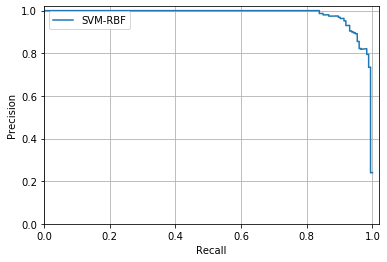

In [74]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test,y_score)

plt.plot(recall,precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(['SVM-RBF'])
plt.grid()
plt.ylim([0.0,1.02])
plt.xlim([0,1.02])